In [29]:
filename x "/opt/sas/data/csv/HR_comma_sep.csv";
proc import datafile=x out=_csv dbms=csv replace; run;


373  ods listing close;ods html5 (id=saspy_internal) file=stdout options(bitmap_mode='inline') device=svg style=HTMLBlue; ods
373! graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: STDOUT
374  
375  filename x "/opt/sas/data/csv/HR_comma_sep.csv";
376  proc import datafile=x out=_csv dbms=csv replace; run;
377   /**********************************************************************
378   *   PRODUCT:   SAS
379   *   VERSION:   V.03.05
380   *   CREATOR:   External File Interface
381   *   DATE:      28APR21
382   *   DESC:      Generated SAS Datastep Code
383   *   TEMPLATE SOURCE:  (None Specified.)
384   ***********************************************************************/
385      data WORK._CSV    ;
386      %let _EFIERR_ = 0; /* set the ERROR detection macro variable */
387      infile X delimiter = ',' MISSOVER DSD  firstobs=2 ;
388         informat satisfaction_level best32. ;
389         informat last_evaluation best32. ;
390         informat numb

In [ ]:
proc contents data=work._csv;
    ods select Variables;
run;

proc print data=work._csv(obs=5);
run;

In [30]:
proc means data=work._csv n nmiss median mean std min p25 p50 p75 max;
run;

Variable,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
satisfaction_level last_evaluation number_project average_montly_hours time_spend_company Work_accident left promotion_last_5years,14999 14999 14999 14999 14999 14999 14999 14999,0 0 0 0 0 0 0 0,0.6400000 0.7200000 4.0000000 200.0000000 3.0000000 0 0 0,0.6128335 0.7161017 3.8030535 201.0503367 3.4982332 0.1446096 0.2380825 0.0212681,0.2486307 0.1711691 1.2325924 49.9430994 1.4601362 0.3517186 0.4259241 0.1442815,0.0900000 0.3600000 2.0000000 96.0000000 2.0000000 0 0 0,0.4400000 0.5600000 3.0000000 156.0000000 3.0000000 0 0 0,0.6400000 0.7200000 4.0000000 200.0000000 3.0000000 0 0 0,0.8200000 0.8700000 5.0000000 245.0000000 4.0000000 0 0 0,1.0000000 1.0000000 7.0000000 310.0000000 10.0000000 1.0000000 1.0000000 1.0000000


In [31]:
proc sql;
select count(*)
from work._csv;

""
14999


In [32]:
create table foo as
select * from work._csv;


440  ods listing close;ods html5 (id=saspy_internal) file=stdout options(bitmap_mode='inline') device=svg style=HTMLBlue; ods
440! graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: STDOUT
441  
442  create table foo as
443  select * from work._csv;
NOTE: Table WORK.FOO created, with 14999 rows and 10 columns.

444  
445  ods html5 (id=saspy_internal) close;ods listing;



In [33]:
select avg(satisfaction_level) from foo;
quit;

""
0.612834



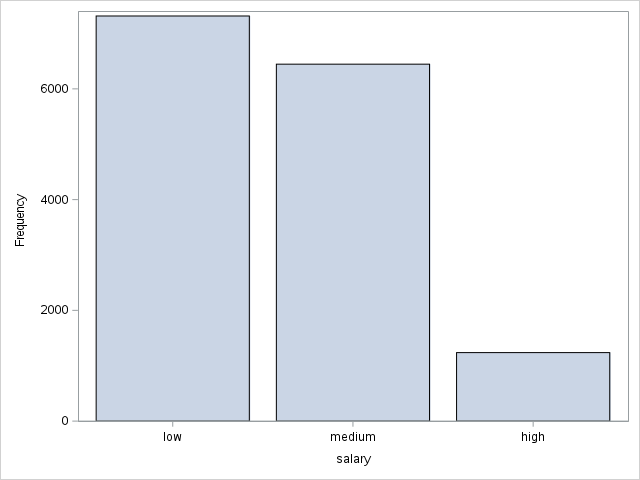
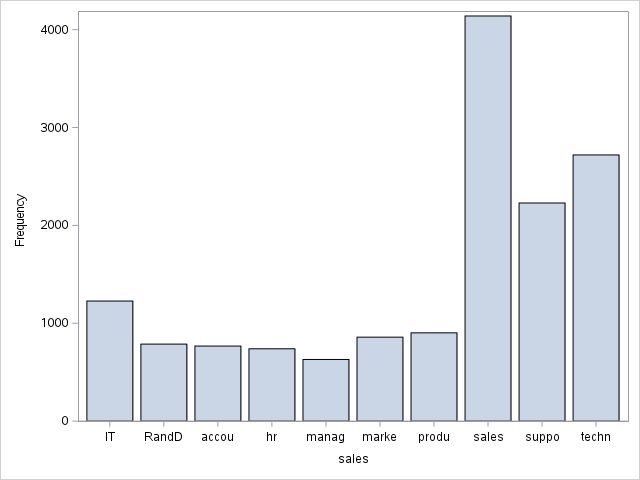

In [34]:
proc sgplot data=work._csv;
    vbar salary;
    xaxis discreteorder=data;
run;

proc sgplot data=work._csv;
    vbar sales;
run;


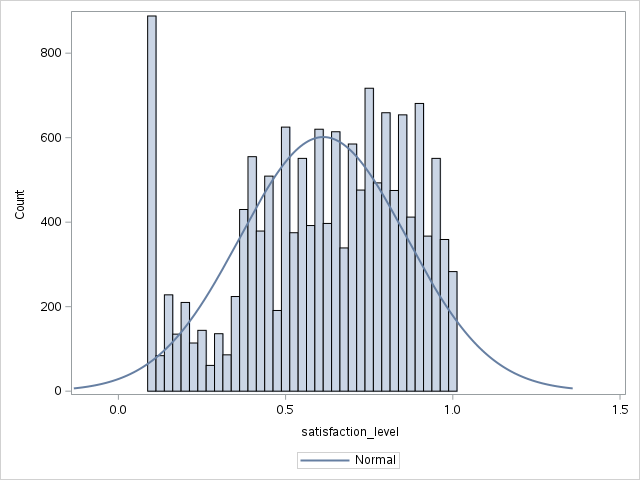
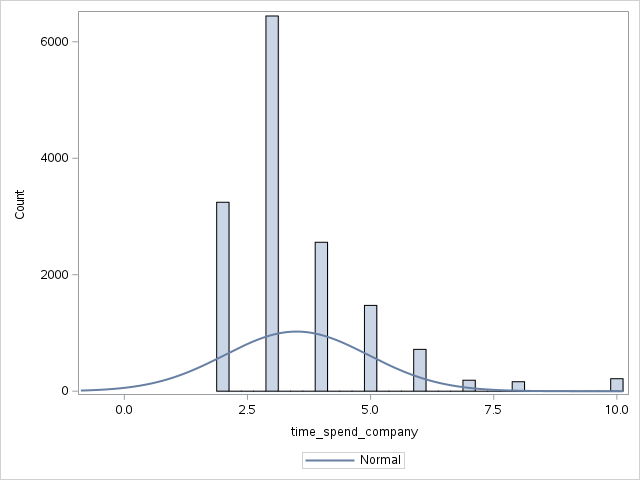
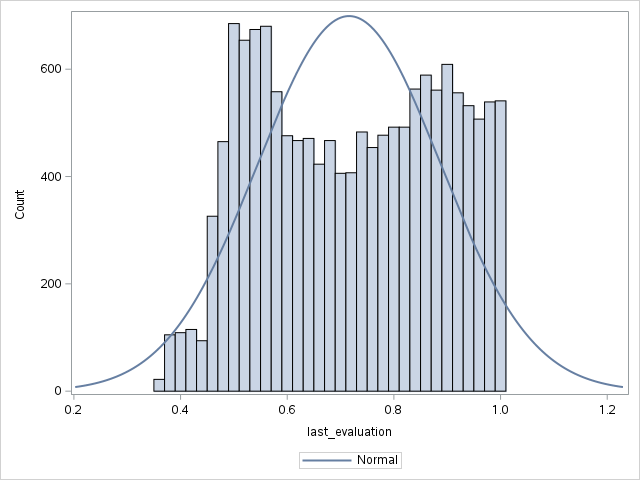

In [35]:
proc sgplot data=work._csv;
    histogram satisfaction_level / scale=count;
    density satisfaction_level;
run;

proc sgplot data=work._csv;
    histogram time_spend_company / scale=count;
    density time_spend_company;
run;

proc sgplot data=work._csv;
    histogram last_evaluation / scale=count;
    density last_evaluation;
run;


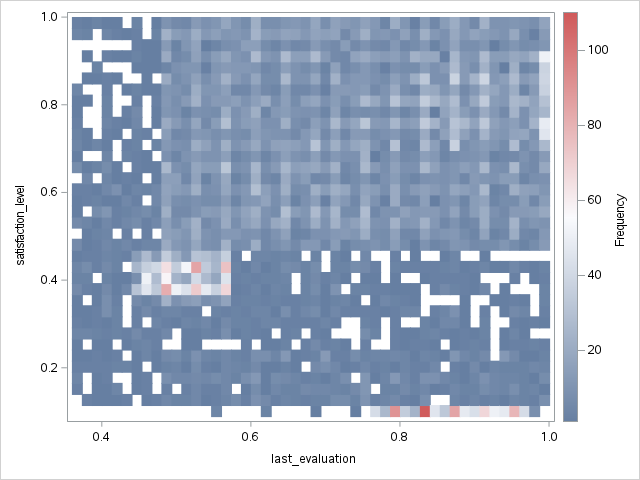

In [36]:
proc sgplot data=work._csv;
    heatmap x=last_evaluation y=satisfaction_level;
run;


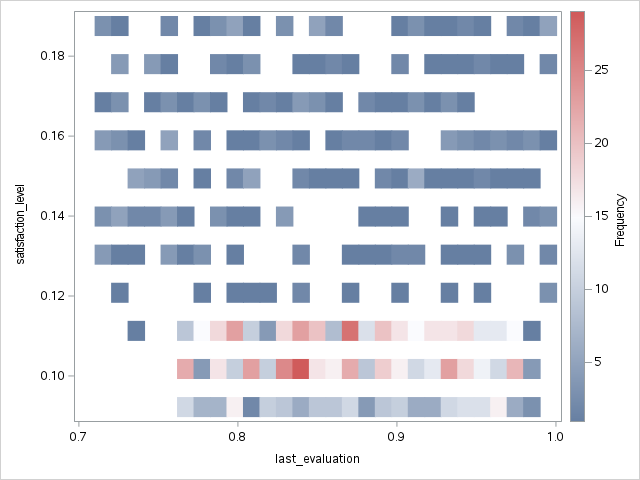

In [37]:
proc sgplot data=work._csv(where=(satisfaction_level < .2 and last_evaluation > .7));
    heatmap x=last_evaluation y=satisfaction_level;
run;


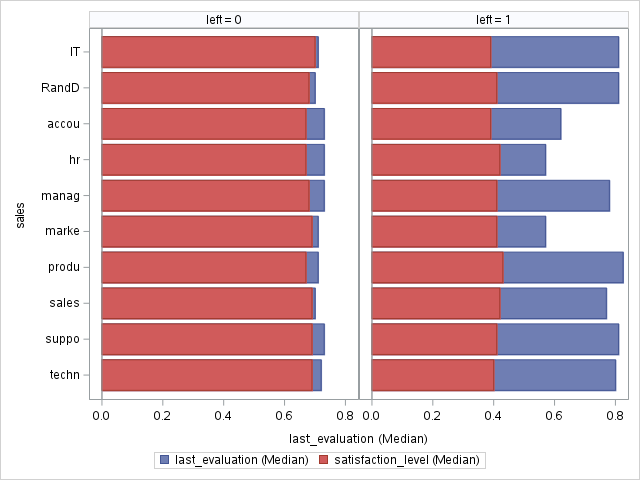

In [38]:
proc sgpanel data=work._csv;
    *where satisfaction_level <.2 and last_evaluation > .7;
    PANELBY left;
    hbar sales / response=last_evaluation    stat=median;
    hbar sales / response=satisfaction_level stat=median ;
run;

In [39]:
proc hpsample data=work._csv out=work._csv samppct=70 seed=9878 partition;
    class left _character_;
    target left;
    var work_accident average_montly_hours last_evaluation number_project
        promotion_last_5years satisfaction_level time_spend_company;
run;